In [57]:
from datetime import date
from datetime import timedelta
import datetime
import requests
import json
import time

from jupyter_dash import JupyterDash
import dash
import dash_bootstrap_components as dbc
from dash import dcc
from dash import html
from dash.dependencies import Input, Output 
import plotly.graph_objects as go
from dash import dash_table as dt

import pandas as pd
import numpy as np

"""head over to def function and run for the backend functionality"""

'head over to def function and run for the backend functionality'

In [42]:
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px

# API KEY FOR WEATHER DATA
API_KEY = '507d7cf5af5d13a39d6c06cdd470f682'

In [27]:
# test code
response = requests.get('https://wheretheiss.at/w/developer')
print(response.status_code)

200


In [28]:
# test code
url = 'https://api.wheretheiss.at/v1/satellites/25544'
requests.get(url).json()

{'name': 'iss',
 'id': 25544,
 'latitude': 35.186737170143,
 'longitude': 24.248905521928,
 'altitude': 426.74315430365,
 'velocity': 27570.817830635,
 'visibility': 'eclipsed',
 'footprint': 4541.611724525,
 'timestamp': 1636913659,
 'daynum': 2459533.2599421,
 'solar_lat': -18.420743341891,
 'solar_lon': 262.55127564024,
 'units': 'kilometers'}

In [29]:
# test code
string = "11-11-2021 09:56:00"

element = datetime.datetime.strptime(string, "%d-%m-%Y %H:%M:%S")

timestamp = datetime.datetime.timestamp(element)
print(timestamp)

1636595760.0


In [30]:
# test code
ts_array = [timestamp] # timestamp forward

df_test = pd.DataFrame()

# store timeframe in datetime for readability
dateformat = []

timestampb = timestamp

for i in range(2):
    timestamp = timestamp - 600
    ts_array.append(timestamp)
    timestampb = timestampb + 600
    ts_array.append(timestampb)
    print(ts_array)

for i in ts_array:
    new_date = datetime.datetime.fromtimestamp(i).strftime('%d-%m-%Y %H:%M:%S')
    dateformat.append(new_date)

print(dateformat)
list_test = {'Date': dateformat, 'Timestamp': ts_array}

df_test['Date'] = dateformat
df_test['Timestamp'] = ts_array 
df_test.head(100)

[1636595760.0, 1636595160.0, 1636596360.0]
[1636595760.0, 1636595160.0, 1636596360.0, 1636594560.0, 1636596960.0]
['11-11-2021 09:56:00', '11-11-2021 09:46:00', '11-11-2021 10:06:00', '11-11-2021 09:36:00', '11-11-2021 10:16:00']


,Date,Timestamp
0,11-11-2021 09:56:00,1.636596e+09
1,11-11-2021 09:46:00,1.636595e+09
2,11-11-2021 10:06:00,1.636596e+09
3,11-11-2021 09:36:00,1.636595e+09
4,11-11-2021 10:16:00,1.636597e+09


In [31]:
# test code
df2 = pd.DataFrame()

for x in ts_array:
    query = {'id':'25544', 'timestamp':x}
    response_a = requests.get('https://api.wheretheiss.at/v1/satellites', params=query).json()
    df = pd.DataFrame.from_dict([response_a])
    print(df)
    df2 = df2.append(df, ignore_index=True)
    time.sleep(2)

df_test['Name'] = df2['name']
df_test['Latitude'] = df2['latitude']
df_test['Longitude'] = df2['longitude']
df_test['Altitude'] = df2['altitude']
df_test['Velocity'] = df2['velocity']
df_test['Visibility'] = df2['visibility']
df_test['Footprint'] = df2['footprint']
df_test['Timestamp'] = df2['timestamp']
df_test['Daynum'] = df2['daynum']
df_test['Solar Latitude'] = df2['solar_lat']
df_test['Solar Longitude'] = df2['solar_lon']
df_test['Units'] = df2['units']

df_test.head()

  name     id   latitude  longitude    altitude      velocity visibility  \
0  iss  25544  31.700247 -73.981863  425.253209  27573.224362   eclipsed   

     footprint   timestamp        daynum  solar_lat   solar_lon       units  
0  4534.093451  1636595760  2.459530e+06 -17.441709  147.004312  kilometers  
  name     id  latitude  longitude    altitude      velocity visibility  \
0  iss  25544  2.459502 -98.584452  424.357641  27563.887103   eclipsed   

    footprint   timestamp        daynum  solar_lat   solar_lon       units  
0  4529.56707  1636595160  2.459530e+06 -17.439796  149.504119  kilometers  
  name     id   latitude  longitude   altitude      velocity visibility  \
0  iss  25544  50.844206 -30.490423  427.77398  27578.400664   eclipsed   

     footprint   timestamp        daynum  solar_lat   solar_lon       units  
0  4546.804388  1636596360  2.459530e+06 -17.443622  144.504505  kilometers  
  name     id  latitude   longitude  altitude      velocity visibility  \
0  is

,Date,Timestamp,Name,Latitude,Longitude,Altitude,Velocity,Visibility,Footprint,Daynum,Solar Latitude,Solar Longitude,Units
0,11-11-2021 09:56:00,1636595760,iss,31.700247,-73.981863,425.253209,27573.224362,eclipsed,4534.093451,2.459530e+06,-17.441709,147.004312,kilometers
1,11-11-2021 09:46:00,1636595160,iss,2.459502,-98.584452,424.357641,27563.887103,eclipsed,4529.567070,2.459530e+06,-17.439796,149.504119,kilometers
2,11-11-2021 10:06:00,1636596360,iss,50.844206,-30.490423,427.773980,27578.400664,eclipsed,4546.804388,2.459530e+06,-17.443622,144.504505,kilometers
3,11-11-2021 09:36:00,1636594560,iss,-27.282290,-121.926445,431.062200,27546.500369,daylight,4563.320153,2.459530e+06,-17.437882,152.003926,kilometers
4,11-11-2021 10:16:00,1636596960,iss,43.242543,24.114285,424.179869,27586.762906,eclipsed,4528.667920,2.459530e+06,-17.445535,142.004698,kilometers


In [32]:
# test code
df_test['Latitude']

0    31.700247
1     2.459502
2    50.844206
3   -27.282290
4    43.242543
Name: Latitude, dtype: float64

In [33]:
# test code
df_test['Longitude'] = df_test['Longitude'].astype(str)
df_test['Latitude'] = df_test['Latitude'].astype(str)

In [34]:
# test code
df4 = pd.DataFrame()

In [35]:
# test code
for j, rows in df_test.iterrows():
    lat = rows['Latitude']
    long = rows['Longitude']
    response = requests.get('https://api.wheretheiss.at/v1/coordinates/' + lat +  ',' + long).json()
    df3 = pd.DataFrame.from_dict([response])
    df4 = df4.append(df3, ignore_index=True)
    print(df4)
    time.sleep(2)
    
df_test['Location'] = df4['timezone_id']
df_test.head(1000)

          latitude         longitude timezone_id  offset country_code  \
0  31.700246512249  -73.981863276518   Etc/GMT+5       0           ??   

                                             map_url  
0  https://maps.google.com/maps?q=31.700246512249...  
          latitude         longitude timezone_id  offset country_code  \
0  31.700246512249  -73.981863276518   Etc/GMT+5       0           ??   
1   2.459502416421   -98.58445219404   Etc/GMT+7       0           ??   

                                             map_url  
0  https://maps.google.com/maps?q=31.700246512249...  
1  https://maps.google.com/maps?q=2.459502416421,...  
          latitude         longitude timezone_id  offset country_code  \
0  31.700246512249  -73.981863276518   Etc/GMT+5       0           ??   
1   2.459502416421   -98.58445219404   Etc/GMT+7       0           ??   
2  50.844205628111  -30.490423131204   Etc/GMT+2       0           ??   

                                             map_url  
0  https:/

,Date,Timestamp,Name,Latitude,Longitude,Altitude,Velocity,Visibility,Footprint,Daynum,Solar Latitude,Solar Longitude,Units,Location
0,11-11-2021 09:56:00,1636595760,iss,31.700246512249,-73.981863276518,425.253209,27573.224362,eclipsed,4534.093451,2.459530e+06,-17.441709,147.004312,kilometers,Etc/GMT+5
1,11-11-2021 09:46:00,1636595160,iss,2.459502416421,-98.58445219404,424.357641,27563.887103,eclipsed,4529.567070,2.459530e+06,-17.439796,149.504119,kilometers,Etc/GMT+7
2,11-11-2021 10:06:00,1636596360,iss,50.844205628111,-30.490423131204,427.773980,27578.400664,eclipsed,4546.804388,2.459530e+06,-17.443622,144.504505,kilometers,Etc/GMT+2
3,11-11-2021 09:36:00,1636594560,iss,-27.282290086075,-121.9264448676,431.062200,27546.500369,daylight,4563.320153,2.459530e+06,-17.437882,152.003926,kilometers,Etc/GMT+8
4,11-11-2021 10:16:00,1636596960,iss,43.242542673011,24.114284717719,424.179869,27586.762906,eclipsed,4528.667920,2.459530e+06,-17.445535,142.004698,kilometers,Europe/Sofia


In [60]:
# test code
temp_arr = []
temp_final = []
desc_arr = []

# test code
for j, rows in df_test.iterrows():
    lat = rows['Latitude']
    long = rows['Longitude']
    response_c = requests.get('https://api.openweathermap.org/data/2.5/weather?lat=' + lat + '&lon=' + long + '&appid=' + API_KEY).json()
    temp = response_c['main']['temp']
    print(temp)
    temp_arr.append(temp)
    desc = response_c['weather'][0]['description']
    print(desc)
    desc_arr.append(desc)
    
print(temp_arr)
print(desc_arr)

# convert temperature from kelvin to celsius
for i in temp_arr:
    i = i - 273.15
    temp_final.append(i)
    
df_test['Temperature'] = temp_arr
df_test['Description'] = desc_arr
df_test.head()

296.08
scattered clouds
296.56
overcast clouds
282.4
overcast clouds
294.23
light rain
276.29
overcast clouds
[296.08, 296.56, 282.4, 294.23, 276.29]
['scattered clouds', 'overcast clouds', 'overcast clouds', 'light rain', 'overcast clouds']


,Date,Timestamp,Name,Latitude,Longitude,Altitude,Velocity,Visibility,Footprint,Daynum,Solar Latitude,Solar Longitude,Units,Location,Temperature,Description
0,11-11-2021 09:56:00,1636595760,iss,31.700246512249,-73.981863276518,425.253209,27573.224362,eclipsed,4534.093451,2.459530e+06,-17.441709,147.004312,kilometers,Etc/GMT+5,296.08,scattered clouds
1,11-11-2021 09:46:00,1636595160,iss,2.459502416421,-98.58445219404,424.357641,27563.887103,eclipsed,4529.567070,2.459530e+06,-17.439796,149.504119,kilometers,Etc/GMT+7,296.56,overcast clouds
2,11-11-2021 10:06:00,1636596360,iss,50.844205628111,-30.490423131204,427.773980,27578.400664,eclipsed,4546.804388,2.459530e+06,-17.443622,144.504505,kilometers,Etc/GMT+2,282.40,overcast clouds
3,11-11-2021 09:36:00,1636594560,iss,-27.282290086075,-121.9264448676,431.062200,27546.500369,daylight,4563.320153,2.459530e+06,-17.437882,152.003926,kilometers,Etc/GMT+8,294.23,light rain
4,11-11-2021 10:16:00,1636596960,iss,43.242542673011,24.114284717719,424.179869,27586.762906,eclipsed,4528.667920,2.459530e+06,-17.445535,142.004698,kilometers,Europe/Sofia,276.29,overcast clouds


In [43]:
# function to output timezone
def get_iss_info(tm):
    
    df_final = pd.DataFrame()
    df2 = pd.DataFrame()
    df4 = pd.DataFrame()
    
    ts_array = []
    # store timeframe in datetime for user readability
    dateformat = []
    
    element = datetime.datetime.strptime(tm, "%d-%m-%Y %H:%M:%S")

    timestamp = datetime.datetime.timestamp(element)
    
    ts_array = [timestamp] # timestamp forward

    timestampb = timestamp

    for i in range(2):
        timestamp = timestamp - 600
        ts_array.append(timestamp)
        timestampb = timestampb + 600
        ts_array.append(timestampb)
        print(ts_array)

    for i in ts_array:
        new_date = datetime.datetime.fromtimestamp(i).strftime('%d-%m-%Y %H:%M:%S')
        dateformat.append(new_date)

    print(dateformat)

    df_final['Date'] = dateformat
    df_final['Timestamp'] = ts_array 
    df_final.head(100)

    for x in ts_array:
        query = {'id':'25544', 'timestamp':x}
        response_a = requests.get('https://api.wheretheiss.at/v1/satellites', params=query).json()
        df = pd.DataFrame.from_dict([response_a])
        print(df)
        df2 = df2.append(df, ignore_index=True)
        time.sleep(2)

    df_final['Name'] = df2['name']
    df_final['Latitude'] = df2['latitude']
    df_final['Longitude'] = df2['longitude']
    df_final['Altitude'] = df2['altitude']
    df_final['Velocity'] = df2['velocity']
    df_final['Visibility'] = df2['visibility']
    df_final['Footprint'] = df2['footprint']
    df_final['Timestamp'] = df2['timestamp']
    df_final['Daynum'] = df2['daynum']
    df_final['Solar Latitude'] = df2['solar_lat']
    df_final['Solar Longitude'] = df2['solar_lon']
    df_final['Units'] = df2['units']

    df_final.head()
    
    df_final['Longitude'] = df_final['Longitude'].astype(str)
    df_final['Latitude'] = df_final['Latitude'].astype(str)
        
    for j, rows in df_final.iterrows():
        lat = rows['Latitude']
        long = rows['Longitude']
        response = requests.get('https://api.wheretheiss.at/v1/coordinates/' + lat +  ',' + long).json()
        df3 = pd.DataFrame.from_dict([response])
        df4 = df4.append(df3, ignore_index=True)
        print(df4)
        time.sleep(2)

    df_final['Location'] = df4['timezone_id']
    df_final.head(1000)

    return df_final

In [44]:
# function to plot latitude and longitude on world map
def plot_coordinate(tm):
    
    df_storedate = pd.DataFrame(columns=['Date'])
    
    df_store1 = pd.DataFrame()
    df_store2 = pd.DataFrame()
    
    ts_array = []
    ts_arrayb = []
    
    # store timeframe in datetime for user readability
    dateformat = []
    dateformat_b = []
    
    element = datetime.datetime.strptime(tm, "%d-%m-%Y %H:%M:%S")

    timestamp = datetime.datetime.timestamp(element)
    
    timestampb = timestamp
    
    ts_array.append(timestamp)
    ts_arrayb.append(timestampb)
    
    # 2 intervals
    for i in range(2):
        # 600 seconds (10 minute)
        # move forward 10 minutes
        timestamp = timestamp + 600
        ts_array.append(timestamp)
        print(ts_array)
        # move back 10 minutes
        timestampb = timestampb - 600
        ts_arrayb.append(timestampb)
        print(ts_arrayb)
    
    for i in ts_array:
        new_date = datetime.datetime.utcfromtimestamp(i).strftime('%d-%m-%Y %H:%M:%S')
        dateformat.append(new_date)
    
    df_storedate['Date'] = dateformat
    
    for i in ts_arrayb:
        new_dateb = datetime.datetime.utcfromtimestamp(i).strftime('%d-%m-%Y %H:%M:%S')
        dateformat_b.append(new_dateb)
    
    df_storedate['Date'] = dateformat_b
     
    for x in ts_array:
        query = {'id':'25544', 'timestamp':x}
        response = requests.get('https://api.wheretheiss.at/v1/satellites', params=query).json()
        df = pd.DataFrame.from_dict([response])
        df_store1 = df_store1.append(df)
        print(df_store1)
        time.sleep(2)
        
    for y in ts_arrayb:
        query = {'id':'25544', 'timestamp':y}
        response = requests.get('https://api.wheretheiss.at/v1/satellites', params=query).json()
        df2 = pd.DataFrame.from_dict([response])
        df_store2 = df_store2.append(df2)
        print(df_store2)
        time.sleep(2)
    
    df_storefinal = pd.concat([df_store1, df_store2], ignore_index=True)
    
    return df_storefinal

In [64]:
# function to fetch weather api
def get_weather(tm):
    df_final = pd.DataFrame()
    df2 = pd.DataFrame()
    df4 = pd.DataFrame()
    
    ts_array = []
    # store timeframe in datetime for user readability
    dateformat = []
    temp_arr = []
    desc_arr = []
    temp_final = []
   
    element = datetime.datetime.strptime(tm, "%d-%m-%Y %H:%M:%S")

    timestamp = datetime.datetime.timestamp(element)
    
    ts_array = [timestamp] # timestamp forward

    timestampb = timestamp

    for i in range(2):
        timestamp = timestamp - 600
        ts_array.append(timestamp)
        timestampb = timestampb + 600
        ts_array.append(timestampb)
        print(ts_array)

    for i in ts_array:
        new_date = datetime.datetime.fromtimestamp(i).strftime('%d-%m-%Y %H:%M:%S')
        dateformat.append(new_date)

    print(dateformat)

    df_final['Date'] = dateformat
    df_final['Timestamp'] = ts_array 
    df_final.head(100)

    for x in ts_array:
        query = {'id':'25544', 'timestamp':x}
        response_a = requests.get('https://api.wheretheiss.at/v1/satellites', params=query).json()
        df = pd.DataFrame.from_dict([response_a])
        print(df)
        df2 = df2.append(df, ignore_index=True)
        time.sleep(2)

    df_final['Name'] = df2['name']
    df_final['Latitude'] = df2['latitude']
    df_final['Longitude'] = df2['longitude']
    df_final['Altitude'] = df2['altitude']
    df_final['Velocity'] = df2['velocity']
    df_final['Visibility'] = df2['visibility']
    df_final['Footprint'] = df2['footprint']
    df_final['Timestamp'] = df2['timestamp']
    df_final['Daynum'] = df2['daynum']
    df_final['Solar Latitude'] = df2['solar_lat']
    df_final['Solar Longitude'] = df2['solar_lon']
    df_final['Units'] = df2['units']

    df_final.head()
    
    df_final['Longitude'] = df_final['Longitude'].astype(str)
    df_final['Latitude'] = df_final['Latitude'].astype(str)
        
    for j, rows in df_final.iterrows():
        lat = rows['Latitude']
        long = rows['Longitude']
        response = requests.get('https://api.wheretheiss.at/v1/coordinates/' + lat +  ',' + long).json()
        df3 = pd.DataFrame.from_dict([response])
        df4 = df4.append(df3, ignore_index=True)
        print(df4)
        time.sleep(2)

    df_final['Location'] = df4['timezone_id']
    df_final.head(1000)
    
    for j, rows in df_final.iterrows():
        lat = rows['Latitude']
        long = rows['Longitude']
        response_c = requests.get('https://api.openweathermap.org/data/2.5/weather?lat=' + lat + '&lon=' + long + '&appid=' + API_KEY).json()
        temp = response_c['main']['temp']
        print(temp)
        temp_arr.append(temp)
        desc = response_c['weather'][0]['description']
        print(desc)
        desc_arr.append(desc)
        
    for i in temp_arr:
        i = float(i)
        i = i - 273.15
        i = format(i, '.2f')
        print(i)
        temp_final.append(i)
    
    df_final['Temperature'] = temp_final
    df_final['Description'] = desc_arr

    return df_final

In [65]:
geo_df = gpd.read_file(gpd.datasets.get_path('naturalearth_cities')) 

app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP], prevent_initial_callbacks=False)

app.layout = html.Div()

SIDEBAR_STYLE = {
    "position": "fixed",
    "top": 0,
    "left": 0,
    "bottom": 0,
    "width": "26rem",
    "padding": "2rem 1rem",
    "background-color": "#e9ecf5",
    "color": '#FFFFFF',
    "overflow": 'scroll'
}

CONTENT_STYLE = {
    "margin-left": "26rem",
    "margin-right": "0rem",
    "padding": "2rem 1rem",
    "background-color": "#303540",
    "color": '#FFFFFF',
    "font-color": '#FFFFF'
}

def fig1(list_a, list_b, list_c, list_d):
    data = {'Date': list_a, 'Location': list_b, 'Latitude': list_c, 'Longitude': list_d}
    df_new = pd.DataFrame(data)
    fig1 = go.Figure(data=[go.Table(
        header=dict(
            values=["<b>Date</b>", "<b>Location<b>", "<b>Latitude<b>", "<b>Longitude<b>"],
            line_color='white', fill_color='white',
            align='center', font=dict(color='black', size=12),height=50
        ),
        cells=dict(
            values=[df_new['Date'], df_new['Location'], df_new['Latitude'], df_new['Longitude']],
            line_color=['#000'], fill_color=['#465163'],
            align='center', font=dict(color='white', size=11), height=60
          ))
        ])
    fig1.update_layout(margin=dict(
    l=10,
    r=10,
    b=10,
    t=10,
    pad=0
), paper_bgcolor='#303540')
    return fig1

def fig2(list_a, list_b, list_c, list_d):
    data2 = {'Date': list_a, 'Location': list_b, 'Temperature': list_c, 'Weather': list_d}
    df_new2 = pd.DataFrame(data2)
    fig2 = go.Figure(data=[go.Table(
        header=dict(
            values=["<b>Date</b>", "<b>Location<b>", "<b>Temperature<b>", "<b>Weather<b>"],
            line_color='white', fill_color='white',
            align='center', font=dict(color='black', size=12),height=50
        ),
        cells=dict(
            values=[df_new2['Date'], df_new2['Location'], df_new2['Temperature'], df_new2['Weather']],
            line_color=['#000'], fill_color=['#939bad'],
            align='center', font=dict(color='white', size=11), height=60
          ))
        ])
    fig2.update_layout(margin=dict(
    l=10,
    r=10,
    b=10,
    t=10,
    pad=0
), paper_bgcolor='#e9ecf5')
    return fig2

sidebar = html.Div([
    
    dbc.Alert("Weather Update", color="info"),
   
    dbc.Col(html.Div([
                dcc.Graph(
                    id='output-containerb'
                )
                ]), style={'width': '58vh', 'height': '90vh'}),

], style=SIDEBAR_STYLE)

content = html.Div([
    
    dbc.Alert("ISS Geographical Location Detector", color="primary"),
    
    html.Div([
        html.Label(['Enter Date: '],style={"margin-right": "15px"}),
        dcc.Input(
            id = 'start-time-input',
            type = 'text',
            value = '12-11-2021 12:19:00'
        ),
    ]),
    
    html.Br(),
    
    dbc.Col(html.Div([
                dcc.Graph(
                    id='output-container'
                )
                ]), md=8),
    
    html.Br(),
    
    html.Div(children=[
        html.Div(children=[html.H2('Please wait while your data is being processed')], 
                 style={'width': '100%', 'display': 'inline-block', 'border': '2px solid black', 'text-align': 'center', 'font-family': 'Century Gothic'})
    ]),
    
    html.Br(),
    
    html.Div([
        dcc.Graph(id='graph')
    ])

], style=CONTENT_STYLE)

app.layout = html.Div([sidebar, content])

@app.callback(
    dash.dependencies.Output('output-container', 'figure'),
    dash.dependencies.Input('start-time-input', 'value'),
)
def update_output(masa):
    a = get_iss_info(masa)
    new_list = list(a.Date)
    new_listb = list(a.Location)
    new_listc = list(a.Latitude)
    new_listd = list(a.Longitude)
    return fig1(new_list, new_listb, new_listc, new_listd)

@app.callback(
    dash.dependencies.Output('graph', 'figure'),
    dash.dependencies.Input('start-time-input', 'value'),
)
def plot_map(masa_b):
    a = plot_coordinate(masa_b)
    fig = px.scatter_geo(a, lat=a.latitude, lon=a.longitude, hover_name="name")
    fig.update_layout(
        paper_bgcolor = '#303540'
    )
    return fig

@app.callback(
    dash.dependencies.Output('output-containerb', 'figure'),
    dash.dependencies.Input('start-time-input', 'value')
)
def check_temperature(masa_c):
    a = get_weather(masa_c)
    list_1 = list(a.Date)
    list_2 = list(a.Location)
    list_3 = list(a.Temperature)
    list_4 = list(a.Description)
    return fig2(list_1, list_2, list_3, list_4)
    
app.run_server(mode='external')

Dash app running on http://127.0.0.1:8050/


C:\Users\amin1858\Anaconda3\envs\amin\lib\site-packages\jupyter_dash\jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



[1636690740.0, 1636690140.0, 1636691340.0]
[1636690740.0, 1636690140.0, 1636691340.0, 1636689540.0, 1636691940.0]
['12-11-2021 12:19:00', '12-11-2021 12:09:00', '12-11-2021 12:29:00', '12-11-2021 11:59:00', '12-11-2021 12:39:00']
[1636690740.0, 1636691340.0][1636690740.0, 1636690140.0, 1636691340.0]
[1636690740.0, 1636690140.0, 1636691340.0, 1636689540.0, 1636691940.0]
['12-11-2021 12:19:00', '12-11-2021 12:09:00', '12-11-2021 12:29:00', '12-11-2021 11:59:00', '12-11-2021 12:39:00']

[1636690740.0, 1636690140.0]
[1636690740.0, 1636691340.0, 1636691940.0]
[1636690740.0, 1636690140.0, 1636689540.0]
  name     id   latitude   longitude    altitude      velocity visibility  \
0  iss  25544  39.731848 -104.480748  426.682564  27573.390709   eclipsed   

     footprint   timestamp        daynum  solar_lat   solar_lon       units  
0  4541.306283  1636690740  2.459531e+06 -17.741552  111.286979  kilometers  
  name     id   latitude   longitude    altitude      velocity visibility  \
0  iss  

           latitude         longitude     timezone_id  offset country_code  \
0   39.731848429601  -104.48074819587  America/Denver      -7           US   
1   12.228255753059   -132.9692468495       Etc/GMT+9       0           ??   
2    51.69322770028  -52.877300004519       Etc/GMT+4       0           ??   
3  -18.036377118186  -155.09533503875      Etc/GMT+10       0           ??   

                                             map_url  
0  https://maps.google.com/maps?q=39.731848429601...  
1  https://maps.google.com/maps?q=12.228255753059...  
2  https://maps.google.com/maps?q=51.69322770028,...  
3  https://maps.google.com/maps?q=-18.03637711818...  
           latitude         longitude     timezone_id  offset country_code  \
0   39.731848429601  -104.48074819587  America/Denver      -7           US   
1   12.228255753059   -132.9692468495       Etc/GMT+9       0           ??   
2    51.69322770028  -52.877300004519       Etc/GMT+4       0           ??   
3  -18.036377118186  -

In [6]:
# test code
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [8]:
# test code
world.head(10000)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

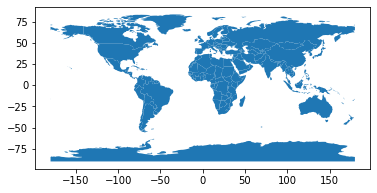

In [9]:
# test code
world.plot()